> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 5: EDA

## Outline

- Univariate analysis (distributions, histograms, counts)
- Bivariate analysis (correlations, scatterplots, group comparisons)
- Reflections and insights

This lab uses the same dataset from **Lab 4**. You will see some overlap in the initial tasks as the data is cleaned.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_05_eda.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

We will be using the same San Francisco rent dataset as in Lab 4.  Some rentals are apartments, others are for homes, and there may be some other random properties for rent.  Each row represents one rental listing.

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     | Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1)|
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library for dataframes.  Then `Matplotlib` and `Seaborn` for data visualization.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

In [37]:
# Get summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [38]:
# Preview the first rows
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


## Part 2: Inspecting Data Quality

### Instructions:
- Check for outliers or invalid data in key numeric variables like `price`, `sqft`, `beds`, or `baths`.  The concept of outliers will be covered more in week 6.  This week we will just look for outliers, but we won't take steps to remove them.     

In [39]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


### In Your Response:
- Do any numeric variables contain extreme or unusual values?
- Should those outlier values be removed?  Or are they valid rental properties?

### ✍️ Your Response: 🔧
1. 1. Yes, there are extreme or unusual values in the numeric variables. Rental prices and square footage show very large maximum values compared to their medians, and some listings have unusually high numbers of bedrooms or bathrooms.
2. 2. These outliers should not be removed at this stage. They likely represent valid luxury or large rental properties rather than data errors, and removing them could distort the analysis.

## Part 3: Univariate Analysis

Explore individual variables to understand their distributions and frequency.

### Tasks:
- Plot histograms for numeric variables (`price`, `sqft`)
- Plot countplots for categorical variables (`beds`, `nhood`)


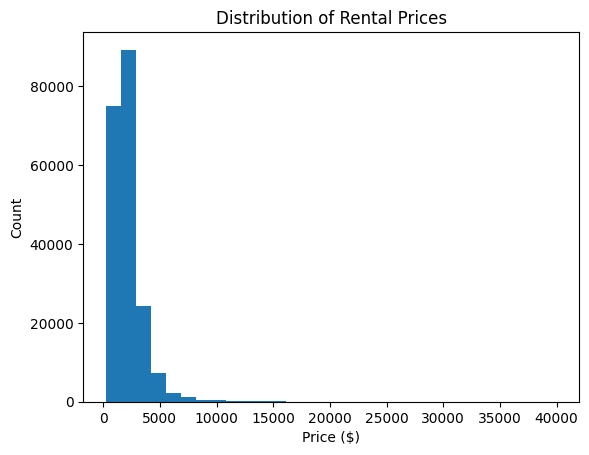

In [40]:
# Histogram: Price
plt.hist(df['price'], bins=30)
plt.title("Distribution of Rental Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

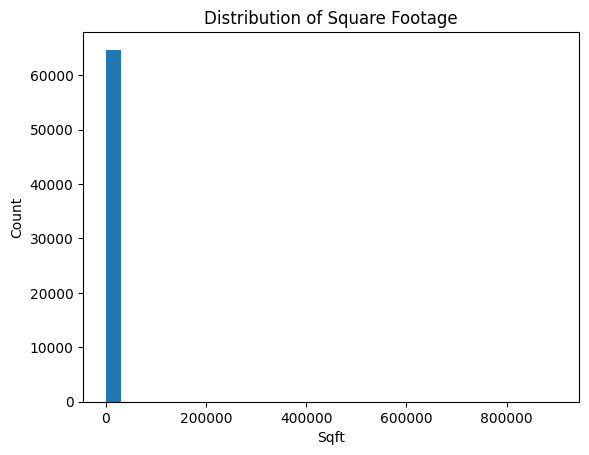

In [41]:
# Histogram: Square Footage
plt.hist(df['sqft'].dropna(), bins=30)
plt.title("Distribution of Square Footage")
plt.xlabel("Sqft")
plt.ylabel("Count")
plt.show()


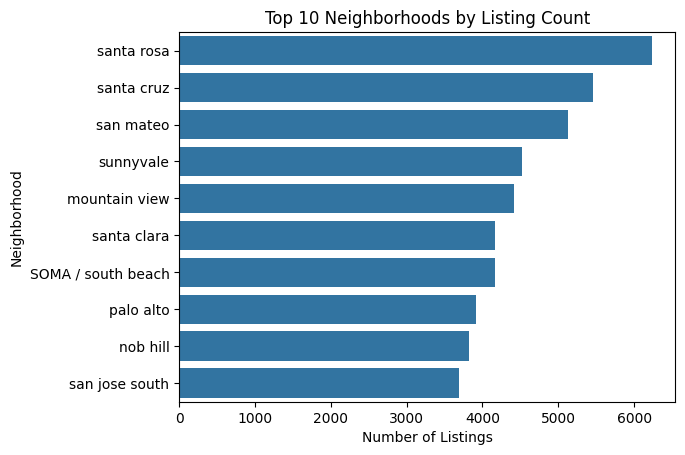

In [42]:
# Bar plot of top 10 neighborhoods by number of listings
top_nhoods = df['nhood'].value_counts().head(10)

sns.barplot(x=top_nhoods.values, y=top_nhoods.index)
plt.title("Top 10 Neighborhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighborhood")
plt.show()

### 🔧 Try It Yourself – Part 4

1. Create two new visualizations using different variables than the ones already shown above.

>Suggestions:
- A **histogram** of the `baths` variable
- A **bar chart** showing the **average square footage by number of bathrooms**

> Be sure to label your axes and include a title for each chart.

### In Your Response:

After creating each of the visuals, write 1–2 sentences explaining what you notice in each.


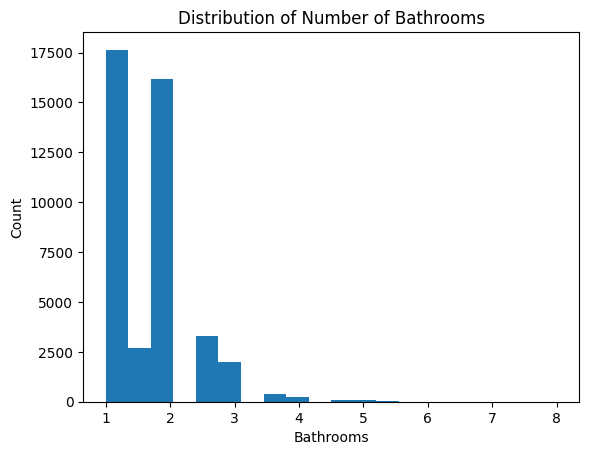

In [43]:
plt.hist(df['baths'].dropna(), bins=20)
plt.title("Distribution of Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.show()

### ✍️ Visual 1 Response: 🔧
1. Most rental listings have between 1 and 2 bathrooms, with the frequency decreasing as the number of bathrooms increases. Listings with many bathrooms are relatively rare and likely represent larger or luxury units.

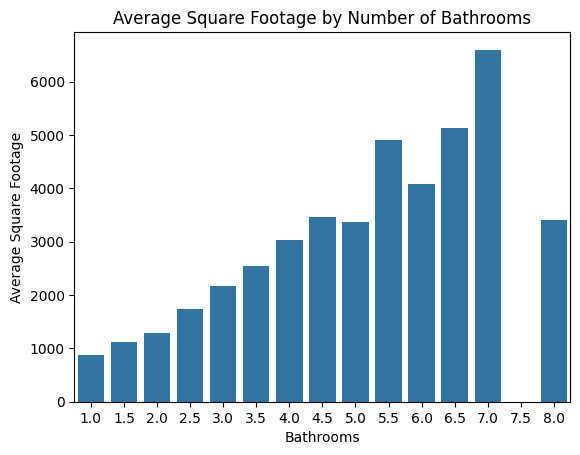

In [44]:
avg_sqft_baths = df.groupby('baths')['sqft'].mean()

sns.barplot(x=avg_sqft_baths.index, y=avg_sqft_baths.values)
plt.title("Average Square Footage by Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Average Square Footage")
plt.show()

### ✍️ Visual 2 Response: 🔧
1. Average square footage increases as the number of bathrooms increases, suggesting that bathroom count is strongly associated with overall unit size. This pattern is consistent with larger properties having more amenities.

## Part 4: Bivariate Analysis

Explore relationships between two variables to understand how features like square footage or bedrooms influence price.


In [45]:
# Correlation matrix
corr_matrix = df[['price', 'beds', 'baths', 'sqft']].corr()
corr_matrix


,price,beds,baths,sqft
price,1.000000,0.450096,0.433553,0.074310
beds,0.450096,1.000000,0.651835,0.707235
baths,0.433553,0.651835,1.000000,0.645372
sqft,0.074310,0.707235,0.645372,1.000000


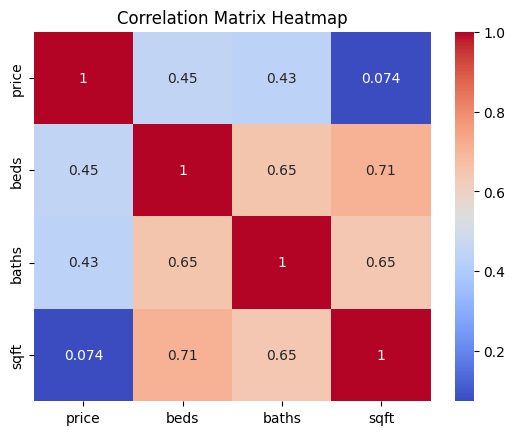

In [46]:
# Heatmap of correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

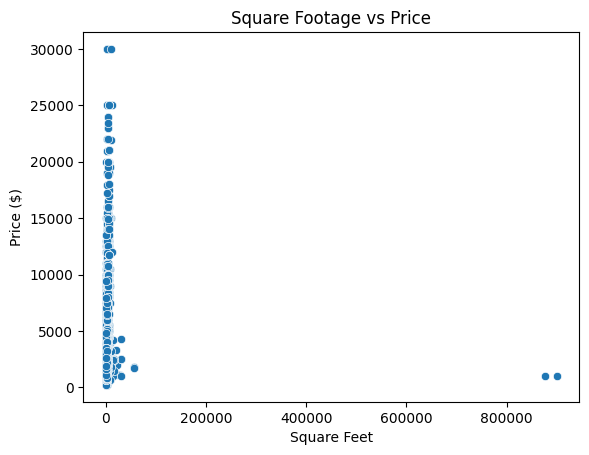

In [47]:
# Scatterplot: Square Footage vs Price
sns.scatterplot(x='sqft', y='price', data=df)
plt.title("Square Footage vs Price")
plt.xlabel("Square Feet")
plt.ylabel("Price ($)")
plt.show()

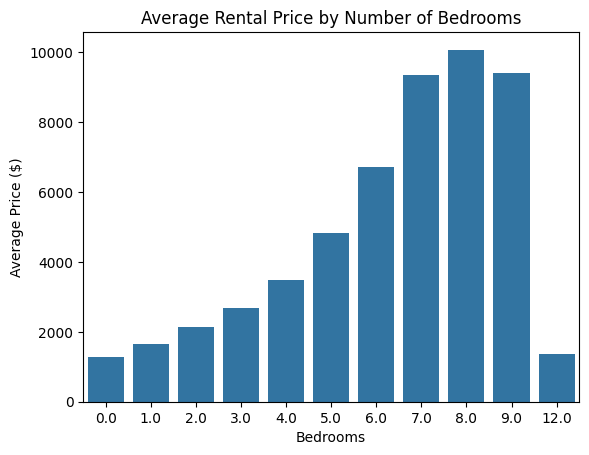

In [48]:
# Average price by number of bedrooms
avg_price_beds = df.groupby('beds')['price'].mean().sort_index()
sns.barplot(x=avg_price_beds.index, y=avg_price_beds.values)
plt.title("Average Rental Price by Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Average Price ($)")
plt.show()

### 🔧 Try It Yourself – Part 5

1. Create a scatterplot of `baths` vs `price`.  
2. Group by `year` and plot the average price over time.

### In Your Response:
1. What trends or outliers do you see?

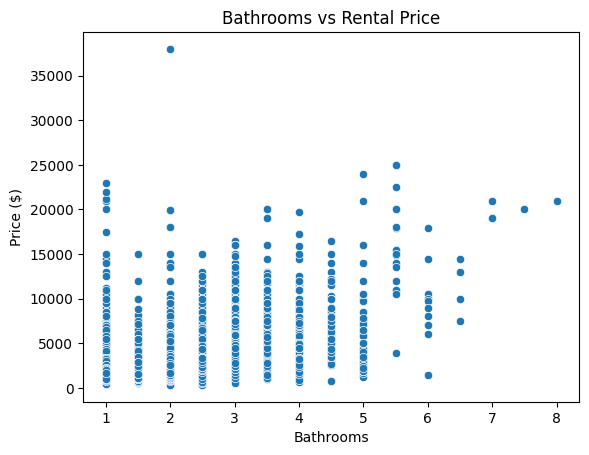

In [49]:
sns.scatterplot(x='baths', y='price', data=df)
plt.title("Bathrooms vs Rental Price")
plt.xlabel("Bathrooms")
plt.ylabel("Price ($)")
plt.show()

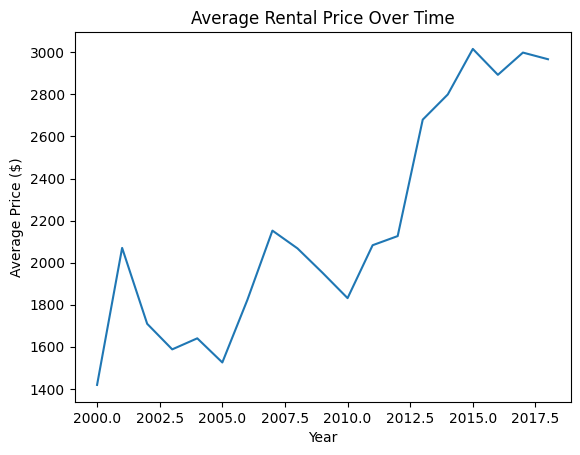

In [50]:
avg_price_year = df.groupby('year')['price'].mean()

sns.lineplot(x=avg_price_year.index, y=avg_price_year.values)
plt.title("Average Rental Price Over Time")
plt.xlabel("Year")
plt.ylabel("Average Price ($)")
plt.show()

### ✍️ Your Response: 🔧
1. Rental prices generally increase as the number of bathrooms increases, although there are some high-price outliers even at lower bathroom counts. Over time, average rental prices show an upward trend, indicating rising housing costs across years with some fluctuations.

## 🔧  Part 5: Reflection

Answer the following questions in the markdown cell below (no more than a few sentences per question required)

1. Which variables are most strongly correlated with rental price?
2. Are there patterns in how size (sqft) or number of bedrooms affects price?
3. Which neighborhoods or years show the highest prices?
4. What other visualizations or groupings might improve this analysis?

Use this section to summarize insights from both Labs 4 and 5.

### ✍️ Your Response: 🔧
1. Square footage shows the strongest correlation with rental price, followed by the number of bathrooms and bedrooms.
2. Larger units with more square footage and more bedrooms generally have higher rental prices, though there is variability due to location and property type.
3. Certain neighborhoods and more recent years tend to show the highest rental prices, reflecting increased demand and rising housing costs over time.
4. Additional visualizations such as boxplots of price by neighborhood or maps using latitude and longitude could improve the analysis.
5. Overall, Labs 4 and 5 show that rental prices are strongly influenced by size, amenities, location, and time trends, with significant variation across neighborhoods.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [51]:
!jupyter nbconvert --to html "lab_05_eda.ipynb"

[NbConvertApp] WARNING | pattern 'lab_05_eda.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    